# Estudo de Técnicas Básicas de Clustering
-------------------------------------------------------------------------------------------------------------------

## Fontes:
### Vídeos
#### 4 Basic Types of Cluster Analysis used in Data Analytics: https://www.youtube.com/watch?v=Se28XHI2_xE
### Artigos / Tutoriais
#### https://www.datacamp.com/community/tutorials/k-means-clustering-r
#### https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
#### https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68
#### https://www.datacamp.com/community/tutorials/k-means-clustering-python
### Documentação:
#### https://scikit-learn.org/stable/modules/clustering.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Teste Básico K-Means

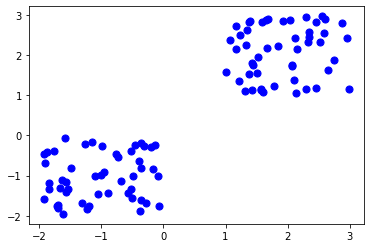

In [2]:
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.show()

In [3]:
kmean = KMeans(n_clusters = 2)
kmean.fit(X)
centroids = kmean.cluster_centers_

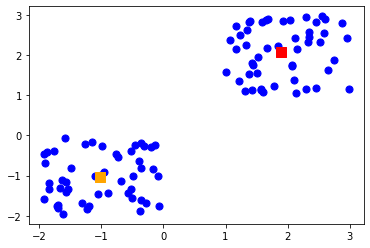

In [4]:
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.scatter(centroids[0][0], centroids[0][1], c = 'orange', marker = 's', s = 100)
plt.scatter(centroids[1][0], centroids[1][1], c = 'red', marker = 's', s = 100)
plt.show()

In [5]:
kmean.predict(np.array([1,-1]).reshape(1,-1))

array([0], dtype=int32)

-------------------------------------------------------------------------------------------------------------------

# Estudo Dataset Titanic
## Link para o dataset: https://www.kaggle.com/c/titanic

In [6]:
url_treinamento = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
df_treinamento = pd.read_csv(url_treinamento)
url_teste = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
df_teste = pd.read_csv(url_teste)

In [7]:
print('Shape df_treino: ', df_treinamento.shape, ' Shape df_teste: ', df_teste.shape)

Shape df_treino:  (891, 12)  Shape df_teste:  (418, 11)


In [8]:
df_treinamento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
df_treinamento.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df_teste.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
df_treinamento.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df_teste.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
df_treinamento.fillna(df_treinamento.mean(), inplace = True)
df_teste.fillna(df_teste.mean(), inplace = True)

In [15]:
df_treinamento[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by=['Survived'], ascending = False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [16]:
df_treinamento[['Sex','Survived']].groupby(['Sex']).mean().sort_values(by=['Survived'], ascending = False)

,Survived
Sex,
female,0.742038
male,0.188908


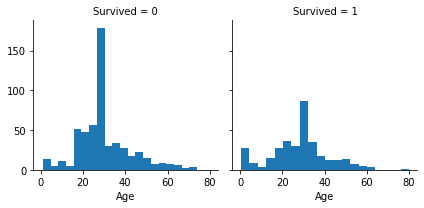

In [17]:
graph = sns.FacetGrid(df_treinamento, col='Survived')
graph.map(plt.hist, 'Age', bins=20)

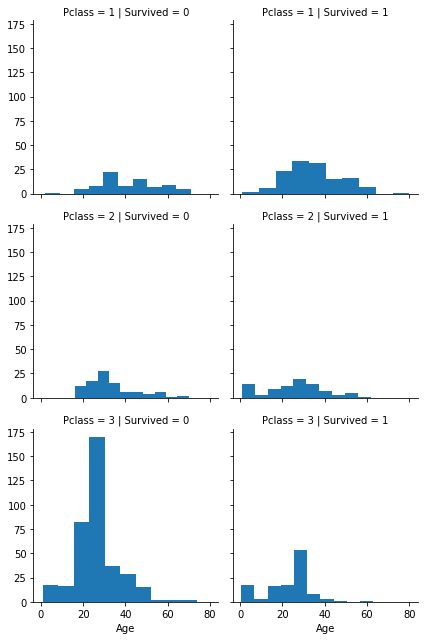

In [18]:
graph = sns.FacetGrid(df_treinamento, col='Survived', row='Pclass')
graph.map(plt.hist, 'Age')

In [19]:
df_treinamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
df_treinamento.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace = True)
df_teste.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace = True)

In [21]:
labelEncoder = LabelEncoder()
labelEncoder.fit(df_treinamento['Sex'])
labelEncoder.fit(df_teste['Sex'])
df_treinamento['Sex'] = labelEncoder.transform(df_treinamento['Sex'])
df_teste['Sex'] = labelEncoder.transform(df_teste['Sex'])

In [22]:
df_treinamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [23]:
X = np.array(df_treinamento.drop(['Survived'], axis = 1).astype(float))

In [24]:
X

array([[  1.    ,   3.    ,   1.    , ...,   1.    ,   0.    ,   7.25  ],
       [  2.    ,   1.    ,   0.    , ...,   1.    ,   0.    ,  71.2833],
       [  3.    ,   3.    ,   0.    , ...,   0.    ,   0.    ,   7.925 ],
       ...,
       [889.    ,   3.    ,   0.    , ...,   1.    ,   2.    ,  23.45  ],
       [890.    ,   1.    ,   1.    , ...,   0.    ,   0.    ,  30.    ],
       [891.    ,   3.    ,   1.    , ...,   0.    ,   0.    ,   7.75  ]])

In [25]:
y = np.array(df_treinamento['Survived'])

In [26]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [27]:
porcentagem_acerto = 0
for i in range(len(X)):
    predict = np.array(X[i].astype(float))
    predict = predict.reshape(-1, len(predict))
    prediction = kmeans.predict(predict)
    if prediction[0] == y[i]:
        porcentagem_acerto += 1
print('Clusterizações corretas: ' + str(round(100 * porcentagem_acerto/len(X))) + '%')

Clusterizações corretas: 51%
